In [1]:
import pandas as pd
import numpy as np
import copy

label_df = pd.read_excel("animal_labels_V2.xlsx", header = 1)

In [2]:
prediction_columns = ["0P", "1P", "2P", "3P", "4P", "5P", "6P", "7P"]
non_prediction_columns = ["0NP", "1NP", "2NP", "3NP", "4NP", "5NP", "6NP", "7NP"]
pred_dict = {
    "Dog": "Domestic Dog",
    "Cat": "Domestic Cat",
    "Wild": "Wildlife"
}

label_df["PREDS"] = label_df["PREDS"].map(pred_dict)
prediction_df = label_df[prediction_columns].copy(deep=True)
non_prediction_df = label_df[non_prediction_columns].copy(deep=True)
all_df = label_df[non_prediction_columns + prediction_columns].copy(deep=True)

In [3]:
def proportion_of_value(row, value, columns):
    row = row[columns].dropna()
    count = (row == value).sum()
    return np.round((count / row.notna().sum()),2)

for value in ["Domestic Cat", "Domestic Dog", "Wildlife"]:
    prediction_df.loc[:, f'Proportion {value}'] = prediction_df.apply(lambda row: proportion_of_value(row, value, prediction_columns), axis=1)
    non_prediction_df.loc[:, f'Proportion {value}'] = non_prediction_df.apply(lambda row: proportion_of_value(row, value, non_prediction_columns), axis=1)
    all_df.loc[:, f'Proportion {value}'] = all_df.apply(lambda row: proportion_of_value(row, value, non_prediction_columns + prediction_columns), axis=1)

In [6]:
def get_argmax(row):
    return ["Domestic Cat", "Domestic Dog", "Wildlife"][np.argmax(row)]

prediction_df["Argmax Label"] = prediction_df[["Proportion Domestic Cat", "Proportion Domestic Dog", "Proportion Wildlife"]].apply(get_argmax, axis=1)
non_prediction_df["Argmax Label"] = non_prediction_df[["Proportion Domestic Cat", "Proportion Domestic Dog", "Proportion Wildlife"]].apply(get_argmax, axis=1)
all_df["Argmax Label"] = all_df[["Proportion Domestic Cat", "Proportion Domestic Dog", "Proportion Wildlife"]].apply(get_argmax, axis=1)


prediction_df["Label Confidence"] = prediction_df[["Proportion Domestic Cat", "Proportion Domestic Dog", "Proportion Wildlife"]].max(axis=1)
non_prediction_df["Label Confidence"] = non_prediction_df[["Proportion Domestic Cat", "Proportion Domestic Dog", "Proportion Wildlife"]].max(axis=1)
all_df["Label Confidence"] = all_df[["Proportion Domestic Cat", "Proportion Domestic Dog", "Proportion Wildlife"]].max(axis=1)


In [7]:
df = pd.DataFrame({
    "Image ID": label_df["Image ID"],
    "Prediction": label_df["PREDS"],
    "Label WITH Prediction": prediction_df["Argmax Label"],
    "Label WITHOUT Prediction":non_prediction_df["Argmax Label"],
    "Label Both": all_df["Argmax Label"],
    "Confidence WITH Prediction": prediction_df["Label Confidence"],
    "Confidence WITHOUT Prediction": non_prediction_df["Label Confidence"],
    "Confidence Both": all_df["Label Confidence"],
})

In [8]:
all_labels = df[["Label Both"]]
#all_labels.to_csv("annotated_labels.csv")

In [9]:
all_labels

,Label Both
0,Wildlife
1,Domestic Dog
2,Wildlife
3,Domestic Cat
4,Domestic Cat
...,...
143,Domestic Dog
144,Domestic Cat
145,Domestic Dog
146,Domestic Dog


In [10]:
df[df["Label WITH Prediction"] != df["Label WITHOUT Prediction"]]

,Image ID,Prediction,Label WITH Prediction,Label WITHOUT Prediction,Label Both,Confidence WITH Prediction,Confidence WITHOUT Prediction,Confidence Both
10,10,Domestic Dog,Domestic Dog,Wildlife,Wildlife,0.50,0.75,0.62
11,11,Domestic Dog,Domestic Dog,Wildlife,Wildlife,0.50,0.75,0.62
13,13,Wildlife,Domestic Dog,Wildlife,Domestic Dog,0.50,0.50,0.38
22,22,Domestic Cat,Wildlife,Domestic Cat,Wildlife,0.75,0.50,0.62
25,25,Wildlife,Wildlife,Domestic Cat,Wildlife,0.75,0.50,0.62
53,53,Domestic Cat,Domestic Cat,Wildlife,Wildlife,0.50,0.75,0.62
61,61,Domestic Cat,Domestic Cat,Wildlife,Domestic Cat,0.75,0.75,0.50
62,62,Domestic Cat,Wildlife,Domestic Cat,Wildlife,0.75,0.50,0.62
70,70,Domestic Cat,Domestic Cat,Wildlife,Wildlife,0.50,0.75,0.62
72,72,Domestic Cat,Domestic Cat,Wildlife,Domestic Cat,0.75,0.75,0.50


Label Stats:

In [11]:
print(f'The percentage of labels agreeing with model predictions is: {100*len( df[df["Prediction"] == df["Label Both"]]) / len(df) }')
print(f'The percentage of labels WITH predictions agreeing with model predictions is: {100*len( df[df["Prediction"] == df["Label WITH Prediction"]]) / len(df) }')
print(f'The percentage of labels WITHOUT predictions agreeing with model predictions is: {100*len( df[df["Prediction"] == df["Label WITHOUT Prediction"]]) / len(df) }')

The percentage of labels agreeing with model predictions is: 80.4054054054054
The percentage of labels WITH predictions agreeing with model predictions is: 81.08108108108108
The percentage of labels WITHOUT predictions agreeing with model predictions is: 80.4054054054054


In [12]:
print("Confidence is defined as the proportion of users which have given the most common label.")
print(f'The percentage of labels with 100% confidence: {100*len( df[df["Confidence Both"] == 1]) / len(df) }')
print(f'The percentage of labels WITH predictions with 100% confidence: {100*len( df[df["Confidence WITH Prediction"] == 1]) / len(df) }')
print(f'The percentage of labels WITHOUT predictions with 100% confidence: {100*len( df[df["Confidence WITHOUT Prediction"] == 1]) / len(df) }')

Confidence is defined as the proportion of users which have given the most common label.
The percentage of labels with 100% confidence: 53.37837837837838
The percentage of labels WITH predictions with 100% confidence: 64.86486486486487
The percentage of labels WITHOUT predictions with 100% confidence: 64.1891891891892


Where did labels disagree?

In [13]:
print(len(df[df["Label WITH Prediction"] != df["Label WITHOUT Prediction"]]))

19


In [14]:
import cv2, os, glob

#df[df["Label WITH Prediction"] != df["Label WITHOUT Prediction"]]

fileList = glob.glob(f'../images_to_be_labelled/*')
        
images = []

for path in fileList:
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    resized_arr = cv2.resize(img_arr, (256,256)) # Reshaping images to preferred size
    images.append(resized_arr)

In [15]:
incorrect_images = []
incorrect_predictions = []
incorrect_labels = []

for i, row in df[df["Label Both"] != df["Prediction"]].iterrows():
    incorrect_images.append(images[row["Image ID"]])
    incorrect_predictions.append(row["Prediction"])
    incorrect_labels.append(row["Label Both"])

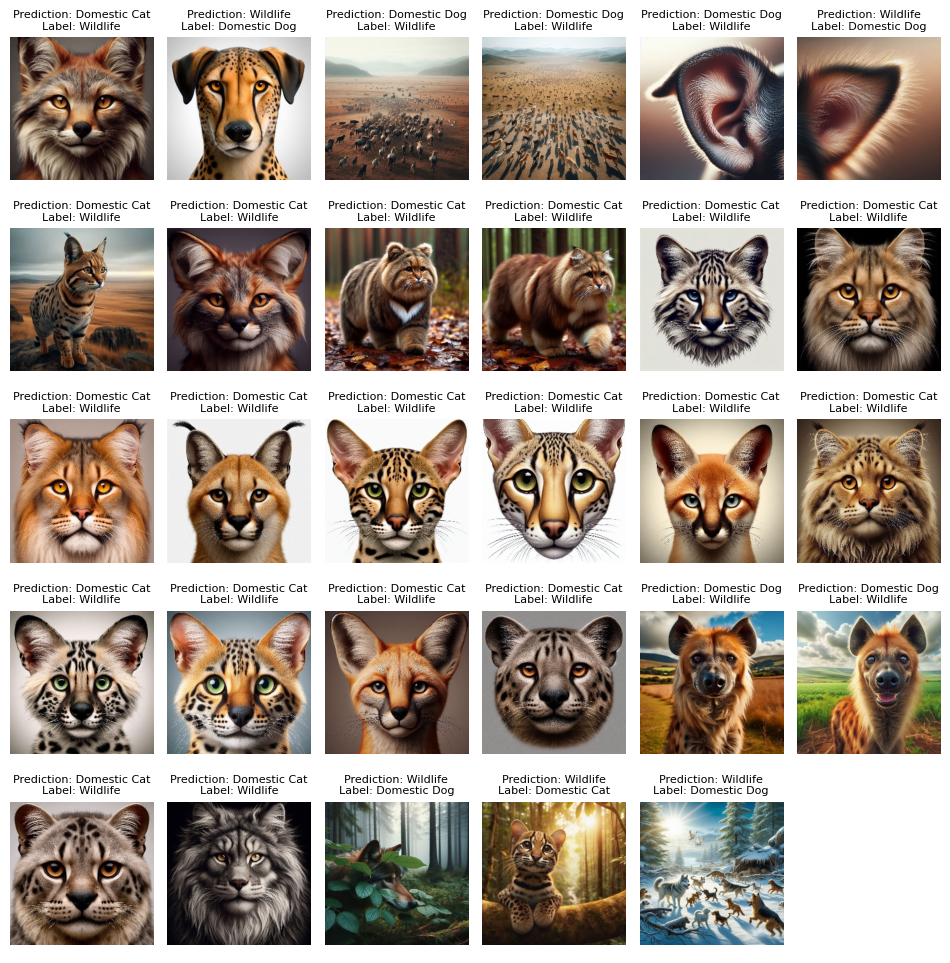

In [16]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5,6, figsize = (12,12))

for i, ax in enumerate(axs.flat):
    try:
        ax.imshow(incorrect_images[i])
        ax.axis("off")
        ax.set_title(f"Prediction: {incorrect_predictions[i]}\nLabel: {incorrect_labels[i]}",  fontsize=8)
    except:
        ax.axis("off")

fig.subplots_adjust(wspace=0.1, hspace=0.2) 